<a href="https://colab.research.google.com/github/naman-DA/Large_Sentiment_Analysis/blob/main/large_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [3]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# load dataset
data_path = '/content/sample_data/large_sentiment_analysis_dataset.csv'
data = pd.read_csv(data_path)

In [7]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     10000 non-null  object
 1   Sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


Data preprocessing


In [8]:
# checking for missing values
data.dropna(inplace=True)

In [9]:
# splitting data into training and testing sets
x = data['Review']
y = data['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# vectorization using TF-IDF
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

Model implementation


In [11]:
# model training
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [12]:
# predictions
y_pred = model.predict(x_test_tfidf)

In [13]:
# evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       658
     Neutral       1.00      1.00      1.00       639
    Positive       1.00      1.00      1.00       703

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



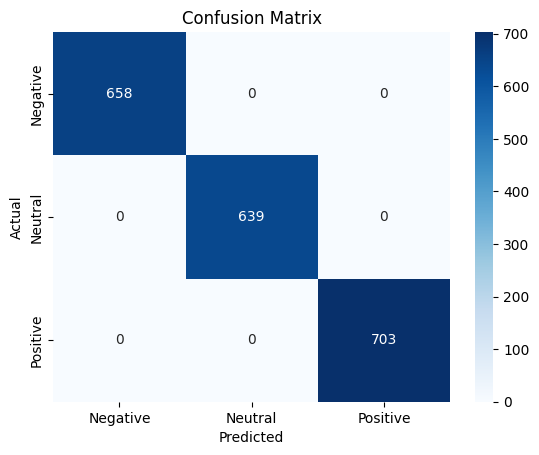

In [14]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Insights

# The TF-IDF vectorizer captures the importance of words in each review.
# Multinomial Naive Bayes is used due to its effectiveness for text classification.
# The accuracy and confusion matrix provide a quick look at model performance.
